In [1]:
# import
import cv2
from PIL import Image
from scipy import signal,ndimage
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math
import openpyxl 
import pickle
import os as os
import tiffile as tif
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
import numpy.matlib as matlib

from stability import *

## User Variables

In [2]:
# These xvals and yvals are crop indices for the min and max x value and the min and max y vals respectively 
xvals, yvals = [335,910], [440,630]
# elements to remove from segmented image
large_elements_pixels= 10000
small_elements_pixels= 0
# figure DPI
dpi = 150
# erosion kernel size
k = 6

## Vision segmentation of samples

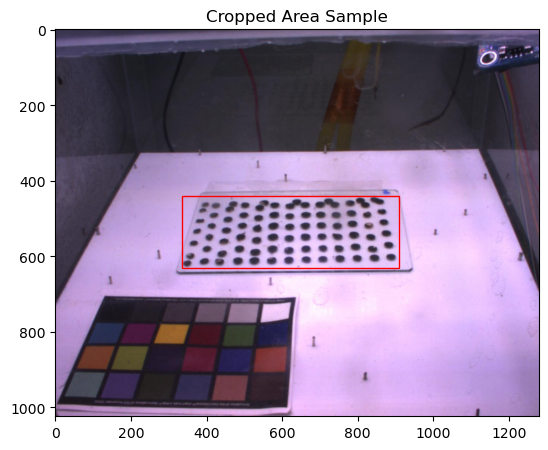

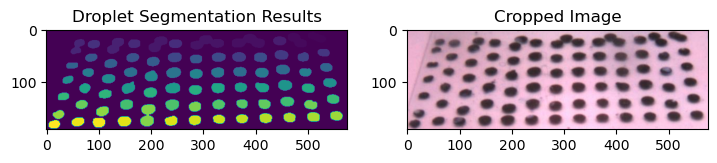

Saved sample data


In [3]:
name = pickle.load(open('./sample-data/name','rb'))
ID_path = './sample-data/sample_names.xlsx'
wb_obj = openpyxl.load_workbook(ID_path) 
sheet_obj = wb_obj.active 
Sample_ID = sheet_obj.cell(row=2, column = 1).value
Notes = sheet_obj.cell(row=2,column=4).value
Time_Step = sheet_obj.cell(row=2,column=5).value
pixel_to_length = sheet_obj.cell(row=2,column=3).value
start_image = sheet_obj.cell(row=2,column=2).value
img_name = name[start_image-1]
# Define Image location
img_path = f'./sample-data/images/{img_name}'
# Draw rectangle and extract Indices
# Open Image through PIL and CV2
img_pil = Image.open(img_path, 'r')
im = Image.fromarray(np.array(img_pil, dtype=np.uint8), 'RGB')
img_cv2 = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
im_cv2 = Image.fromarray(np.array(img_cv2, dtype=np.uint8), 'RGB')
# crop image
ll_x, ll_y, width, height = crop_box(im, xvals,yvals)
crop_params = {'theta': 0,'x1': ll_x,'x2': ll_x+width,'y1': ll_y, 'y2': ll_y+height}
crop_image = RRC(img_path, crop_params,'cv2')
crop_image_pil = RRC(img_path, crop_params,'pil')
crop_image_array = Image.fromarray(np.array(crop_image, dtype=np.uint8), 'RGB') 

####### PLOT SEGMENTATION #########
##################################
fig, ax = plt.subplots(1,2, figsize=(img_cv2.shape[1] / dpi, img_cv2.shape[0] / dpi))
droplet_count = water(crop_image, small_elements_pixels, large_elements_pixels)
droplet_count = droplet_count.astype('uint8')
ax[0].imshow(droplet_count)
ax[1].imshow(crop_image)
ax[0].title.set_text('Droplet Segmentation Results')
ax[1].title.set_text('Cropped Image')
plt.show()
##################################

# erode samples
kernel = np.ones((k,k), np.uint8)
img_erode = cv2.erode(droplet_count, kernel)
# This step superimposes the segmented droplets onto the original image 
# to serve as a visual check for the droplet segmentation. 
# This is the final step of droplet Segmentation
crop_image_erode = np.array(crop_image, dtype=np.uint8)
PIL_crop_image_erode = np.array(crop_image_pil, dtype=np.uint8)
img_for = img_erode
for n in np.unique(img_for):
    if n != 0:
        x = np.where(img_erode == n)
        crop_image_erode[x] = [n]
        PIL_crop_image_erode[x] = [n]
# save sample information        
sample = output_for_labeling(crop_params, crop_image_pil, img_erode,Sample_ID, droplet_count, crop_image_erode, PIL_crop_image_erode, img_name, Notes, pixel_to_length )


## Color correction

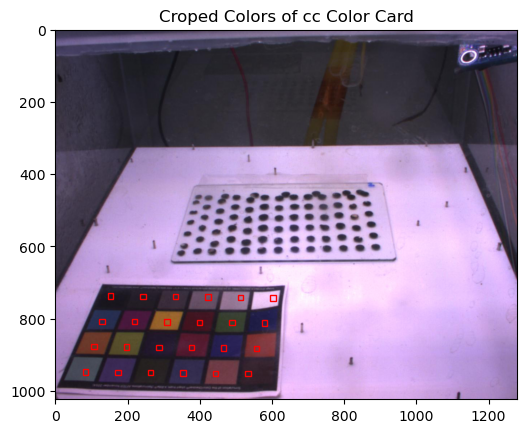

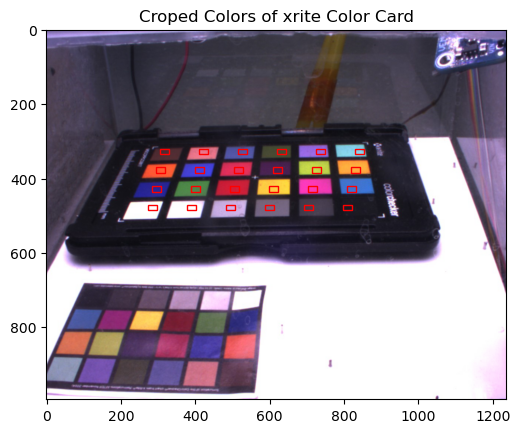

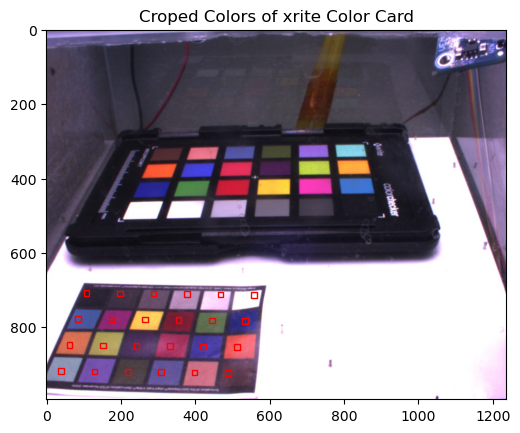

In [4]:
x_vals, y_vals = [145,650], [730,1000]
wid = 15
hei= 15
cc_ll_x, cc_ll_y = cc_crop(x_vals,y_vals,wid,hei,im,75,55,-23,1,'cc')
# cc_ll_x/y is 1x24 starting from top left cc color going down and moving on to the next column 
# Xrite crop 
image = Image.open('./sample-data/images/xrite.jpg', 'r')
img_xrite = Image.fromarray(np.array(image, dtype=np.uint8), 'RGB')
x_vals, y_vals = [305,980], [320,450]
wid_x = 25
hei_x = 15
xc_ll_x, xc_ll_y = cc_crop(x_vals,y_vals,wid_x,hei_x,img_xrite,80,35,-11,0,'xrite')
# Crop the Color Card in the Xrite Image 
img_xrite = Image.fromarray(np.array(image, dtype=np.uint8), 'RGB')
x_vals, y_vals = [100,650], [700,1000]
wid_int = 15
hei_int = 15
int_ll_x, int_ll_y = cc_crop(x_vals,y_vals,wid_int,hei_int,img_xrite,75,55,-23,1,'xrite')


## Run the stability measurement and plot results

The complete stability measurement process takes ~30 minutes to run.

Image 1/69 Stability Computation Complete . . .
Image 2/69 Stability Computation Complete . . .
Image 3/69 Stability Computation Complete . . .
Image 4/69 Stability Computation Complete . . .
Image 5/69 Stability Computation Complete . . .
Image 6/69 Stability Computation Complete . . .
Image 7/69 Stability Computation Complete . . .
Image 8/69 Stability Computation Complete . . .
Image 9/69 Stability Computation Complete . . .
Image 10/69 Stability Computation Complete . . .
Image 11/69 Stability Computation Complete . . .
Image 12/69 Stability Computation Complete . . .
Image 13/69 Stability Computation Complete . . .
Image 14/69 Stability Computation Complete . . .
Image 15/69 Stability Computation Complete . . .
Image 16/69 Stability Computation Complete . . .
Image 17/69 Stability Computation Complete . . .
Image 18/69 Stability Computation Complete . . .
Image 19/69 Stability Computation Complete . . .
Image 20/69 Stability Computation Complete . . .
Image 21/69 Stability Computa

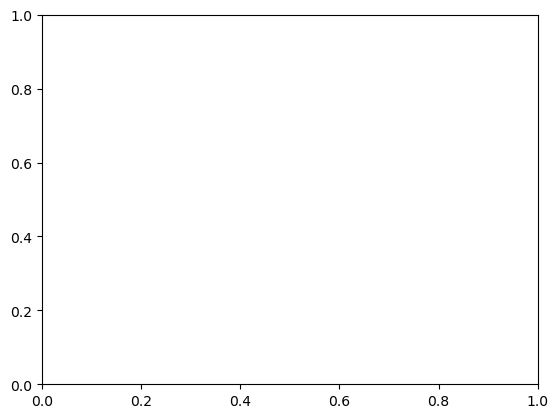

In [5]:
RGB_result, LAB_result = Results('xrite',cc_ll_x,cc_ll_y,xc_ll_x,xc_ll_y,int_ll_x,int_ll_y, wid,hei,wid_x,hei_x,wid_int,hei_int,sample.crop_params,Time_Step,start_image,cut=30)
# pickle.dump(RGB_result, open('./Results/RGB_result_f','wb'))
# RGB vs time data of each droplet 
fig, ax = plt.subplots(1)
segmented_stability_array = np.array([RGB_result]* sample.Number_of_drops)
segmented_stability_array = segmented_stability_array.astype(int)
index = np.where(sample.drops[:] == 0)
segmented_stability_array[index[0],:,:,index[1],index[2]] = 0
# for segmented_stability_array there are 6 indcies segmented_stability_array[a][b][c][d][e][f]
# ie a = 44, b = 20, c =1, d= 430, e= 290, f = 3
# a is the number of droplets, b is the number of images, c is always 1, 
# d is the height of the cropped image ( the area selected for analysis) 
# e if the width of the cropped image, and f is always 3 for the three color channels 
# So to get an image of droplet 30 in time step 40 from segmented_stability_array you use input segmented_stability_array [30][40][0]
pickle.dump(segmented_stability_array, open('./example-output/segmented_stability_array','wb'))

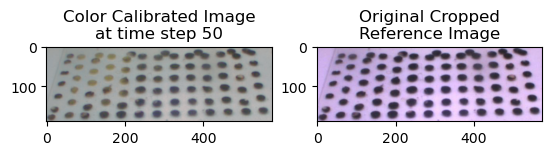

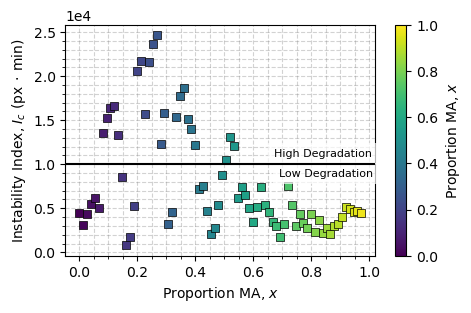

C:\Users\alexs\AppData\Local\Temp\ipykernel_8532\3187930232.py:164: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


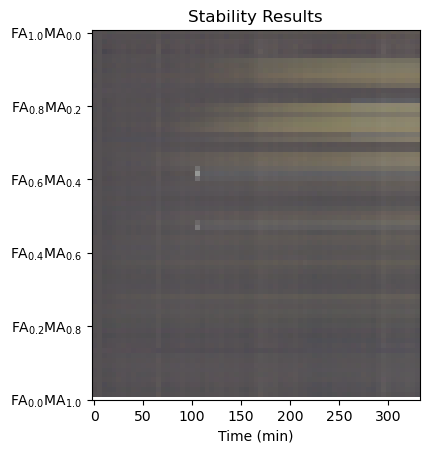

In [157]:
order = pickle.load(open('./sample-data/order','rb'))
Number_of_drops = sample.Number_of_drops
num_pics = pickle.load(open('./sample-data/num_pics','rb'))  
drops= pickle.load(open('./sample-data/drops', 'rb') )
# order = order[1:]
segmented_stability_array = pickle.load(open('./example-output/segmented_stability_array','rb'))
# segmented_stability_array = segmented_stability_array[1:,:,:,:,:,:]



# Plot and and Check Results of color over time
# The Results gives an output of calibrated images over time 
# Change X in RGB_results[X][0] to flip through the images for a simple visual check
X = 50
fig, ax = plt.subplots(1,2)
ax[0].imshow(RGB_result[X][0].astype(int))
ax[1].imshow(sample.crop_img_pil)
ax[0].title.set_text(f'Color Calibrated Image\nat time step {X}')
ax[1].title.set_text('Original Cropped\nReference Image')
plt.show()


segmented_stability_array_RGB = np.array([[None,None,None]]*(num_pics-2))  
segmented_stability_array_RGB = np.array([segmented_stability_array_RGB] * (Number_of_drops))
index = np.where(drops[:] != 0)

# sum the number of pixels in each droplet 
drop_pix = []
for i in range(0,Number_of_drops):
    drop_pix.append(np.size(np.where(drops[i]!=0),1))
    
test = np.sum(segmented_stability_array[:,:,:,index[1],index[2],0], axis = 3) # 75 69 1
r = np.size(test.astype(int),0)
c = np.size(test.astype(int),1)
Test_layer = np.zeros((1,r))
for i in range(c):
    Test_row = np.divide(test[:,i,:].reshape(r),drop_pix)
    if i == 0:
        Test_layer = np.append(Test_layer.reshape(1,r), Test_row.reshape(1,r), axis = 0)
        Test_layer = Test_layer[1,:]
    else:
        Test_layer = np.append(Test_layer.reshape(i,r), Test_row.reshape(1,r), axis = 0)
segmented_stability_array_RGB[:,:,0] = np.array(Test_layer).astype(int).transpose()

test = np.sum(segmented_stability_array[:,:,:,index[1],index[2],1], axis = 3) # 75 69 1
Test_layer = np.zeros((1,r))
for i in range(c):
    Test_row = np.divide(test[:,i,:].reshape(r),drop_pix)
    if i == 0:
        Test_layer = np.append(Test_layer.reshape(1,r), Test_row.reshape(1,r), axis = 0)
        Test_layer = Test_layer[1,:]
    else:
        Test_layer = np.append(Test_layer.reshape(i,r), Test_row.reshape(1,r), axis = 0)
segmented_stability_array_RGB[:,:,1] = np.array(Test_layer).astype(int).transpose()

test = np.sum(segmented_stability_array[:,:,:,index[1],index[2],2], axis = 3) # 75 69 1
Test_layer = np.zeros((1,r))
for i in range(c):
    Test_row = np.divide(test[:,i,:].reshape(r),drop_pix)
    if i == 0:
        Test_layer = np.append(Test_layer.reshape(1,r), Test_row.reshape(1,r), axis = 0)
        Test_layer = Test_layer[1,:]
    else:
        Test_layer = np.append(Test_layer.reshape(i,r), Test_row.reshape(1,r), axis = 0)
segmented_stability_array_RGB[:,:,2] = np.array(Test_layer).astype(int).transpose()

# calculate IC
# For each droplet 
## at each time stamp calculate the change in color across a color channel since time step 0 
# then multiply this diference by the time_step length ( ie 5 minutes) 
# add this to the previous value 
# Do this for all three color chanels and add the three intergrals 
# segmented_stability_array_RGB[:,:,0] # all the red values of droplets over each time step 
# Create an array with all first color values of each droplet 
# Red 
C0_R = segmented_stability_array_RGB[:,3,0] # length 75 
# Green 
C0_G= segmented_stability_array_RGB[:,3,1] # length 75
# Blue 
C0_B = segmented_stability_array_RGB[:,3,2] # length 75


# Subtract this from each column of segmented_stability_array
Test_C0_Ct_R = segmented_stability_array_RGB[:,np.arange(1,c-1),0] - C0_R[..., np.newaxis]
Test_C0_Ct_G = segmented_stability_array_RGB[:,np.arange(1,c-1),1] - C0_G[..., np.newaxis]
Test_C0_Ct_B = segmented_stability_array_RGB[:,np.arange(1,c-1),2] - C0_B[..., np.newaxis]

# Define the time step 
time_step = 5 # minutes 

# Multiply by the time step 
Test_C0_R_Area = np.absolute(Test_C0_Ct_R * time_step)
Test_C0_G_Area = np.absolute(Test_C0_Ct_G * time_step)
Test_C0_B_Area = np.absolute(Test_C0_Ct_B * time_step)

# Sum along the rows  = Suming all the (C0 -Ct)* time_step Values for all time steps for each droplet 
Test_sum_int_R = np.sum(Test_C0_R_Area, axis = 1 )
Test_sum_int_G = np.sum(Test_C0_G_Area, axis = 1 )
Test_sum_int_B = np.sum(Test_C0_B_Area, axis = 1 )
# The result of the last step should be 3, 75 long arrays with each element being the intergral sum of the R,G, or B values of that droplet over time 

Ic = Test_sum_int_R+Test_sum_int_G+Test_sum_int_B
# The resulting Ic should be of length 75 with the Instability Index for each droplet 

# Reorder segmented_stability_array_RGB
segmented_stability_array_reorder_i = np.copy(segmented_stability_array_RGB)
Ic_reorder = np.copy(Ic)
segmented_stability_array_reorder = np.zeros_like(segmented_stability_array_reorder_i)
for i in range(0,Number_of_drops):
    segmented_stability_array_reorder[order[i],:] = segmented_stability_array_reorder_i[i,:].astype(int)
    Ic_reorder[order[i]] = Ic[i]
    
Ic = Ic_reorder
idx_min = 0
idx_max = Number_of_drops
colormap = mpl.cm.get_cmap('viridis').copy()
fig,ax=plt.subplots(figsize=(5,3))
for n in range(idx_min, idx_max-1):
    idx_norm = (n-idx_min)/(idx_max-idx_min)
    rgba = colormap(idx_norm)
    ax.scatter(n/idx_max, Ic[n], marker='s', color=rgba,zorder=10,ec='k',linewidth=0.5)
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--', alpha=0.35,zorder=0)
ax.grid(which='major', color='gray', linestyle='--', alpha=0.35,zorder=0)
plt.ylabel(r'Instability Index, $I_c$ (px$\:\cdot\:$min)')
plt.xlabel(r'Proportion MA, $x$')
fig.colorbar(mpl.cm.ScalarMappable(norm = mpl.colors.Normalize(vmin=0, vmax=1), cmap=mpl.cm.viridis), label=r'Proportion MA, $x$')
ax.axhline(10000,c='k',zorder=25)
t1=ax.text(.84,10700, 'High Degradation', ha='center',va='bottom', fontsize=8,zorder=20)
t2=ax.text(.85,8400, 'Low Degradation', ha='center',va='bottom', fontsize=8,zorder=20)
t1.set_bbox(dict(facecolor='w', alpha=0.7, lw=0))
t2.set_bbox(dict(facecolor='w', alpha=0.7, lw=0))
ax.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.savefig('./example-output/Ic_results.png',dpi=dpi,bbox_inches='tight')
plt.show()

# Now lets Color Correct the data again 
# Set a median color value 
R_start = np.mean(segmented_stability_array_RGB[:,1,0])
G_start = np.mean(segmented_stability_array_RGB[:,1,1])
B_start = np.mean(segmented_stability_array_RGB[:,1,2])
# Find the diference between this median and everydroplet at time t =1 

Correct_R = segmented_stability_array_reorder[:,1,0] - R_start
Correct_G = segmented_stability_array_reorder[:,1,1] - G_start
Correct_B = segmented_stability_array_reorder[:,1,2] - B_start

segmented_stability_array_RGB_cor = np.copy(segmented_stability_array_reorder)
segmented_stability_array_RGB_cor[:,:,0] = segmented_stability_array_RGB_cor[:,:,0] - Correct_R[..., np.newaxis]
segmented_stability_array_RGB_cor[:,:,1] = segmented_stability_array_RGB_cor[:,:,1] - Correct_G[..., np.newaxis]
segmented_stability_array_RGB_cor[:,:,2] = segmented_stability_array_RGB_cor[:,:,2] - Correct_B[..., np.newaxis]

# Plot the correct results 
fig, ax = plt.subplots(1)
ax.imshow(segmented_stability_array_RGB_cor.astype(int)) 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '0'
labels[2] = '50'
labels[3] = '100'
labels[4] = '150'
labels[5] = '200'
labels[6] = '250'
labels[7] = '300'
ax.set_xticklabels(labels)
plt.yticks([0,15,30,45,60,75], [r'FA$_{1.0}$MA$_{0.0}$',r'FA$_{0.8}$MA$_{0.2}$',r'FA$_{0.6}$MA$_{0.4}$',r'FA$_{0.4}$MA$_{0.6}$',r'FA$_{0.2}$MA$_{0.8}$',r'FA$_{0.0}$MA$_{1.0}$'])
plt.xlabel("Time (min)")
plt.title("Stability Results")
plt.savefig('./example-output/stability_results.png',dpi=dpi,bbox_inches='tight')
plt.show()